In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\Users\kgavu\AppData\Local\Temp\ipykernel_9072\1285016483.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
sns.set(rc={'figure.figsize': (11.7, 8.27)})

In [4]:
cars = pd.read_csv('cars_sampled.csv')
cars.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40
3,19/03/2016 17:50,Seat_Ibiza_1.4_16V_Reference,private,offer,4500,control,small car,2006,manual,86,ibiza,60000,12,petrol,seat,no,19/03/2016 0:00,34537,7/4/2016 4:44
4,16/03/2016 14:51,Volvo_XC90_D5_Aut._RDesign_R_Design_AWD_GSHD_S...,private,offer,18750,test,suv,2008,automatic,185,xc_reihe,150000,11,diesel,volvo,no,16/03/2016 0:00,55270,1/4/2016 23:18


In [5]:
data = cars.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [7]:
pd.set_option('display.float_format', lambda x: "%.2f" % x)
cars.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,50001.00,50001.00,50001.00,50001.00,50001.00,50001.00
mean,6559.87,2005.54,116.50,125613.69,5.74,50775.22
std,85818.47,122.99,230.57,40205.23,3.71,25743.70
min,0.00,1000.00,0.00,5000.00,0.00,1067.00
25%,1150.00,1999.00,69.00,125000.00,3.00,30559.00
50%,2950.00,2003.00,105.00,150000.00,6.00,49504.00
75%,7190.00,2008.00,150.00,150000.00,9.00,71404.00
max,12345678.00,9999.00,19312.00,150000.00,12.00,99998.00


In [8]:
col = ['name', 'dateCrawled', 'dateCreated', 'postalCode', 'lastSeen']
cars = cars.drop(col, axis=1)

In [9]:
cars = cars.drop_duplicates(keep="first")

In [10]:
cars.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

<Axes: xlabel='yearOfRegistration', ylabel='price'>

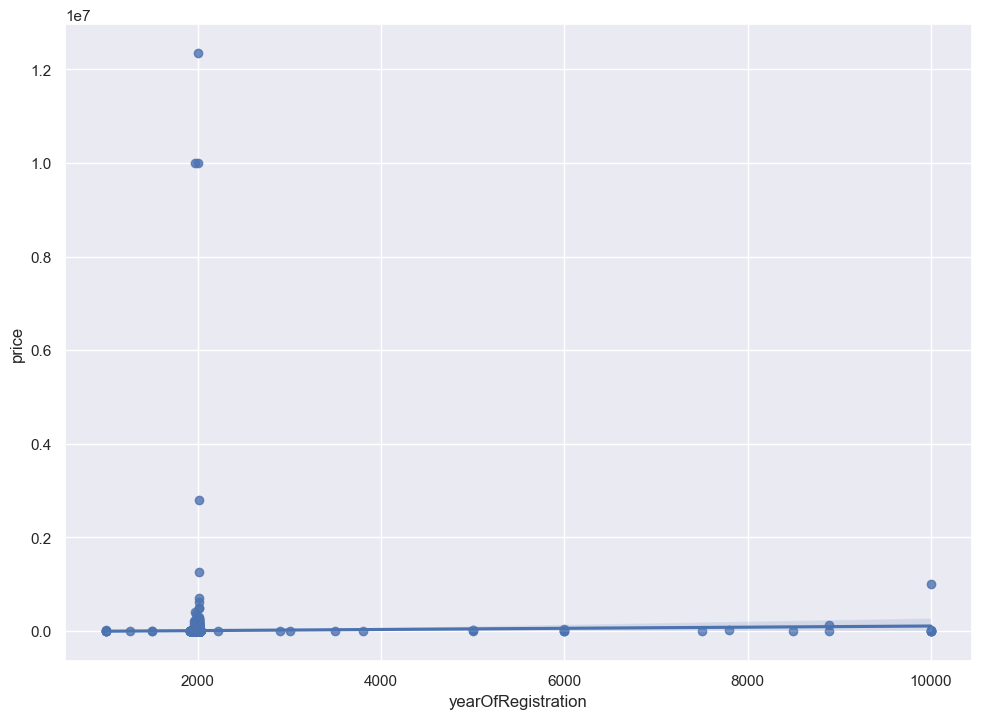

In [11]:
yearCount = cars['yearOfRegistration'].value_counts().sort_index()
sns.regplot(x='yearOfRegistration', y='price', data=cars)

In [12]:
priceCounts = cars['price'].value_counts().sort_index()
priceCounts

price
0           1415
1            172
2              1
3              1
5              4
            ... 
1250000        1
2795000        1
9999999        1
10010011       1
12345678       1
Name: count, Length: 2393, dtype: int64

C:\Users\kgavu\AppData\Local\Temp\ipykernel_9072\3229821580.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['price'])


<Axes: xlabel='price', ylabel='Density'>

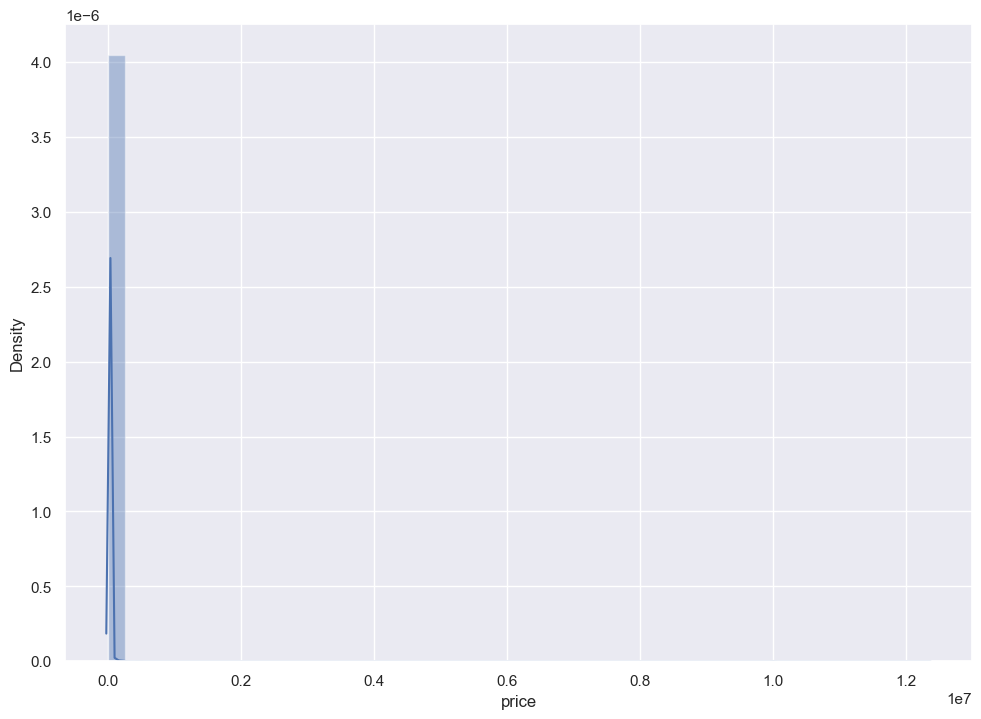

In [13]:
sns.distplot(cars['price'])

<Axes: ylabel='price'>

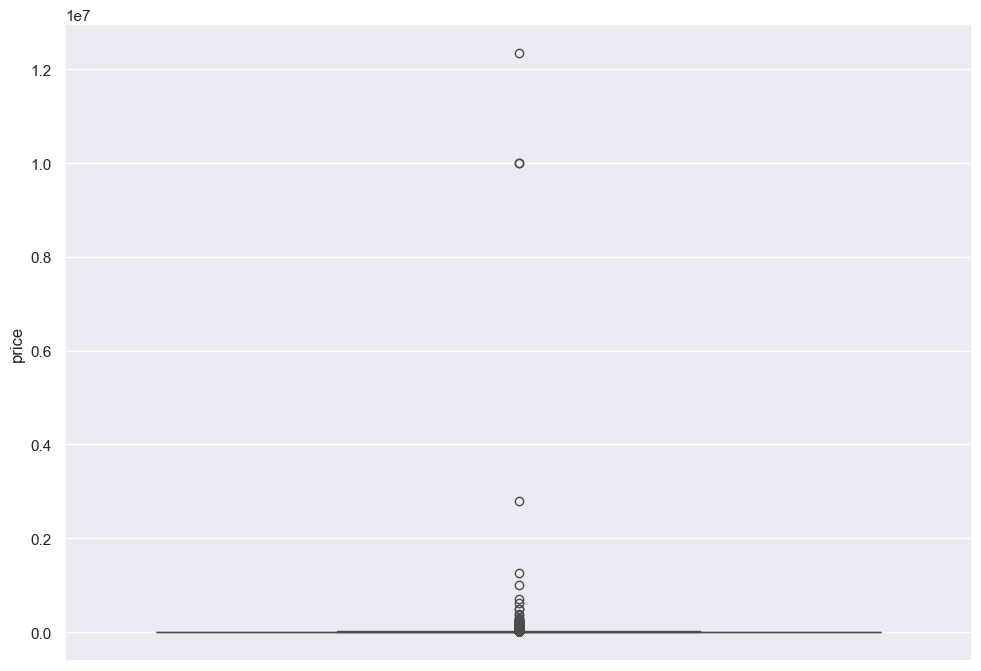

In [14]:
sns.boxplot(y=cars['price'])

C:\Users\kgavu\AppData\Local\Temp\ipykernel_9072\2778916944.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cars['powerPS'])


<Axes: xlabel='powerPS', ylabel='Density'>

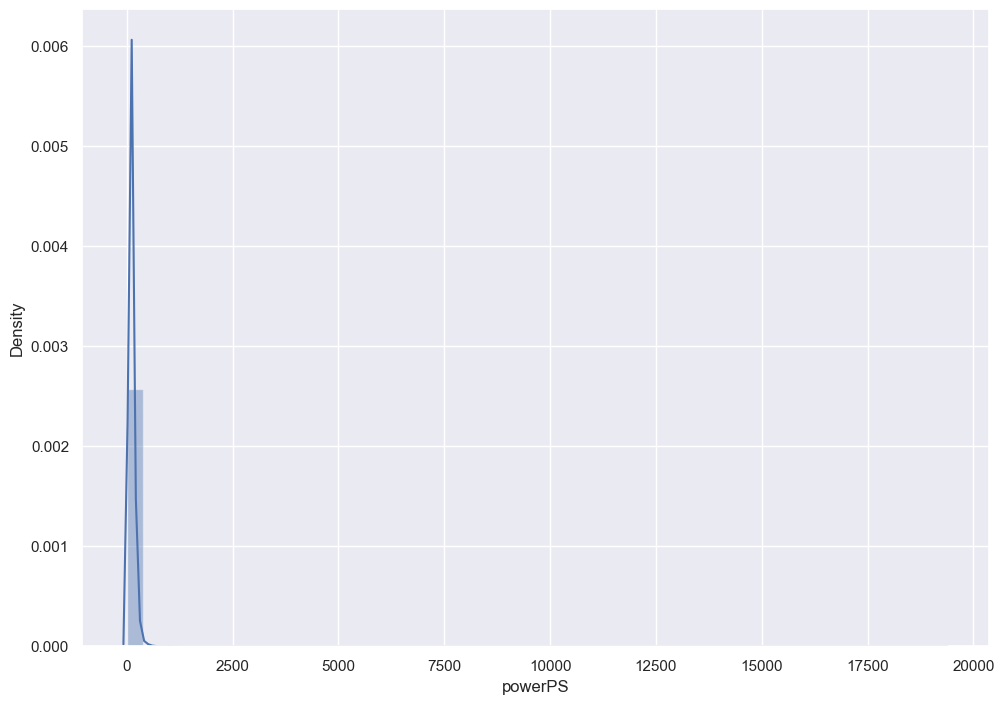

In [16]:
powerCounts = cars['powerPS'].value_counts().sort_index()
sns.distplot(cars['powerPS'])

In [17]:
cars['powerPS'].describe()

count   49531.00
mean      116.50
std       231.54
min         0.00
25%        69.00
50%       105.00
75%       150.00
max     19312.00
Name: powerPS, dtype: float64

<Axes: ylabel='powerPS'>

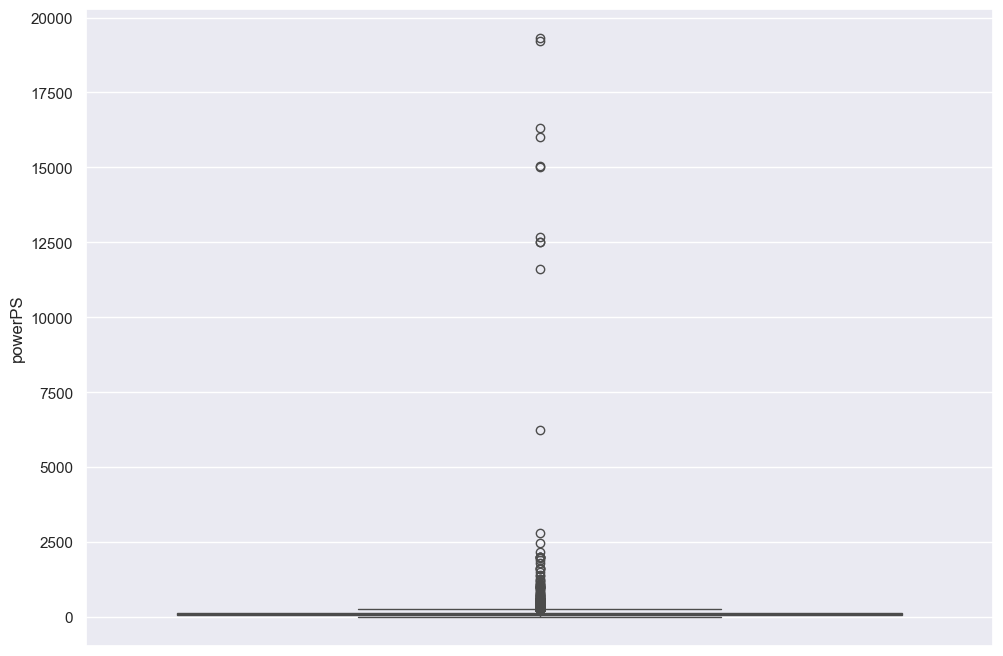

In [18]:
sns.boxplot(y='powerPS', data=cars)

<Axes: xlabel='powerPS', ylabel='price'>

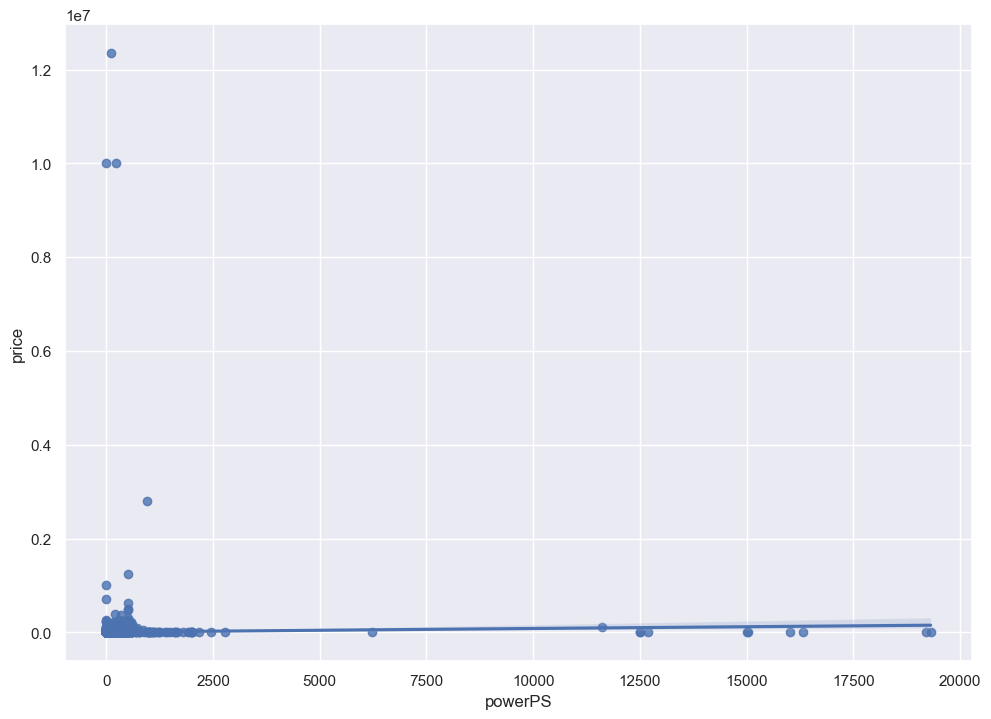

In [19]:
sns.regplot(x='powerPS', y='price', data=cars)

In [21]:
cars = cars[
(cars.yearOfRegistration <= 2018) & 
(cars.yearOfRegistration >= 1950) &
(cars.price >= 100) &
(cars.price <= 150000) &
(cars.powerPS >= 10) &
(cars.powerPS <= 500)
]

In [22]:
cars.shape

(42772, 14)

In [23]:
cars['monthOfRegistration'] /= 12

In [25]:
cars['Age'] = (2018-cars['yearOfRegistration']) + cars['monthOfRegistration']
cars['Age'] = round(cars['Age'], 2)
cars['Age'].describe()

count   42772.00
mean       14.87
std         7.09
min         0.00
25%        10.33
50%        14.83
75%        19.17
max        67.75
Name: Age, dtype: float64

In [26]:
cars = cars.drop(columns=['yearOfRegistration', 'monthOfRegistration'])

<Axes: xlabel='Age', ylabel='Count'>

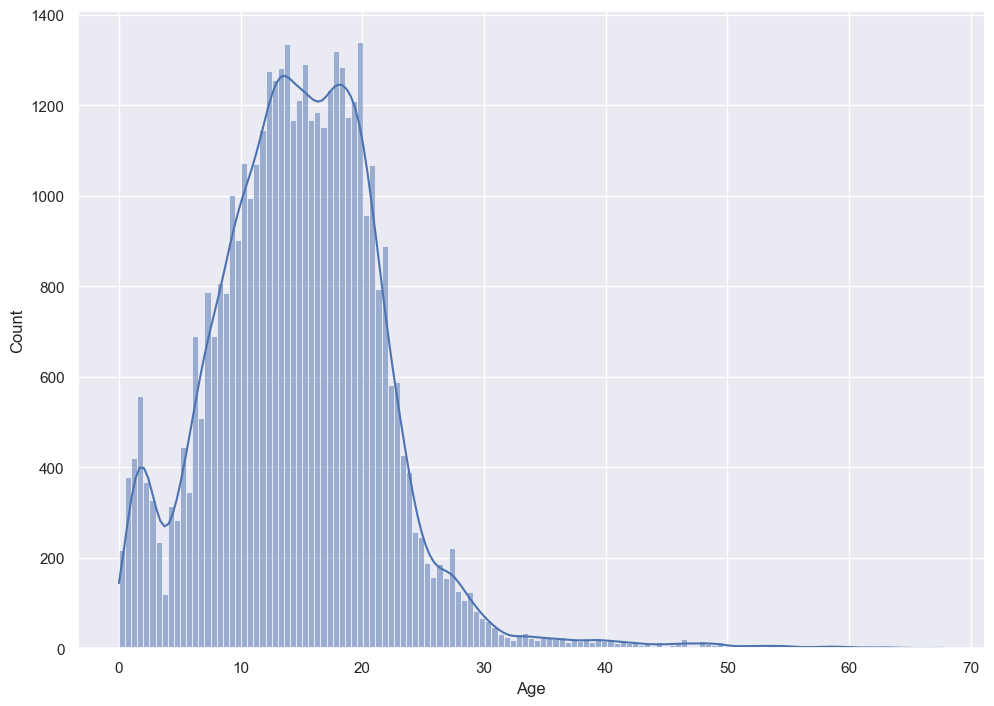

In [31]:
sns.histplot(cars['Age'], kde=True)

<Axes: ylabel='Age'>

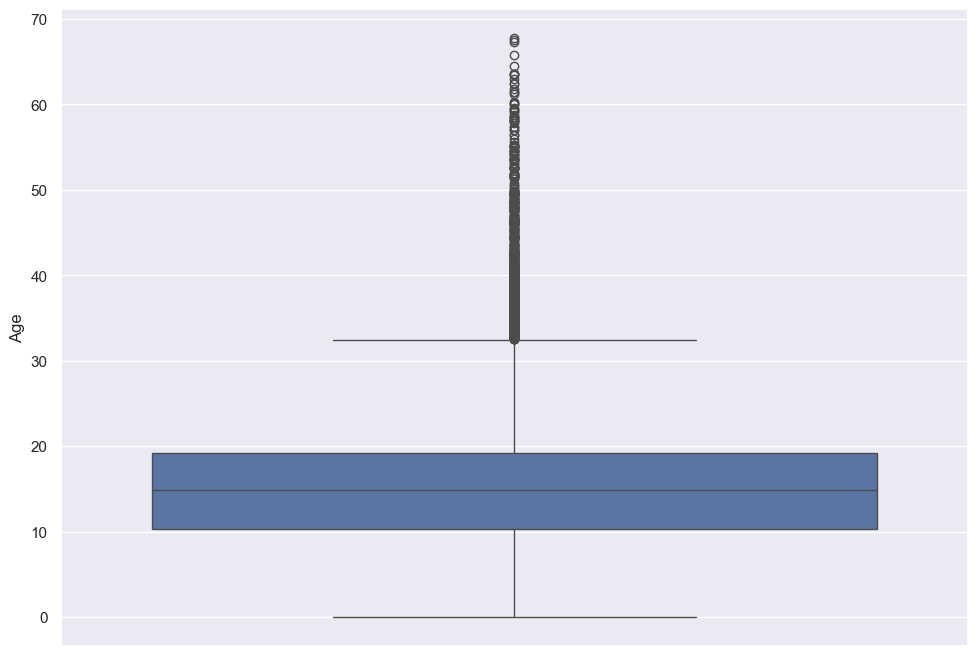

In [33]:
sns.boxplot(y=cars['Age'])

<Axes: xlabel='price', ylabel='Count'>

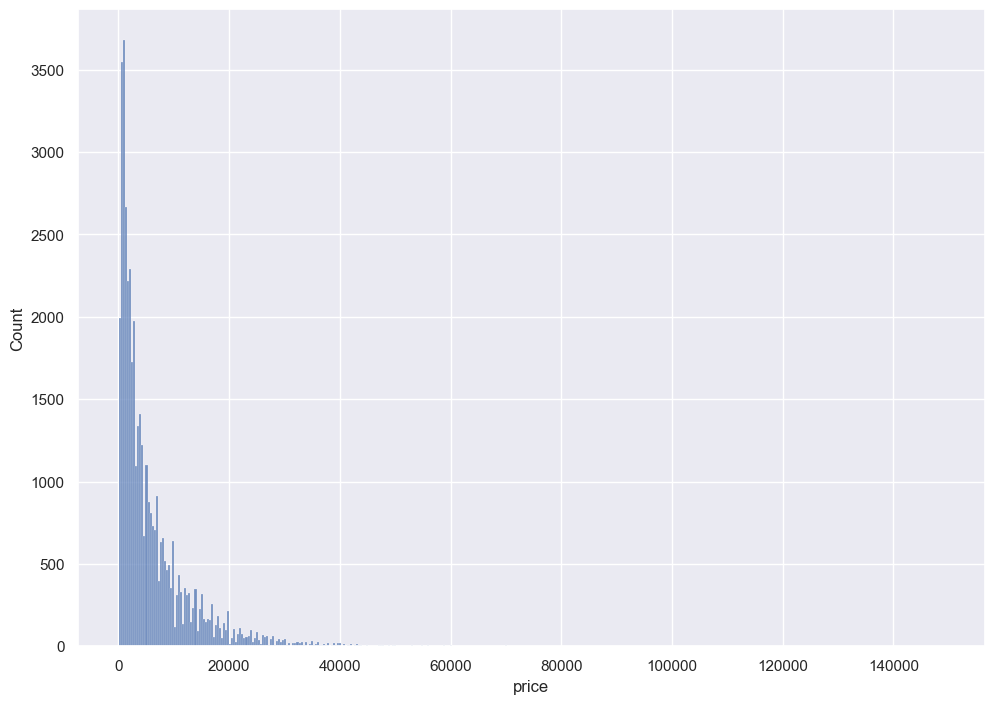

In [35]:
sns.histplot(cars['price'])

<Axes: ylabel='price'>

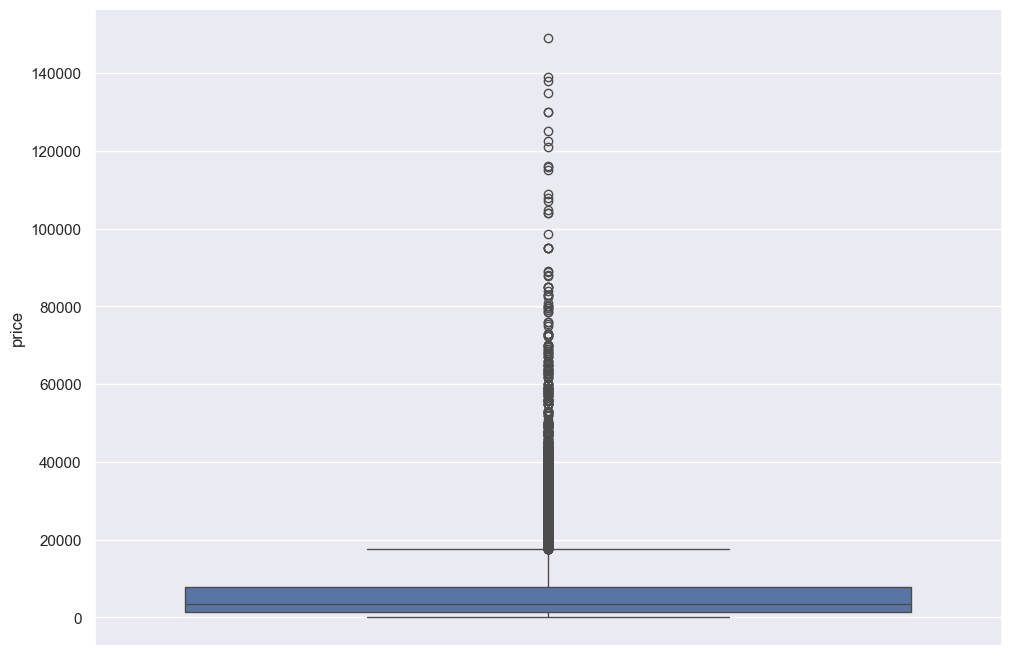

In [36]:

sns.boxplot(y=cars['price'])

<Axes: xlabel='powerPS', ylabel='Count'>

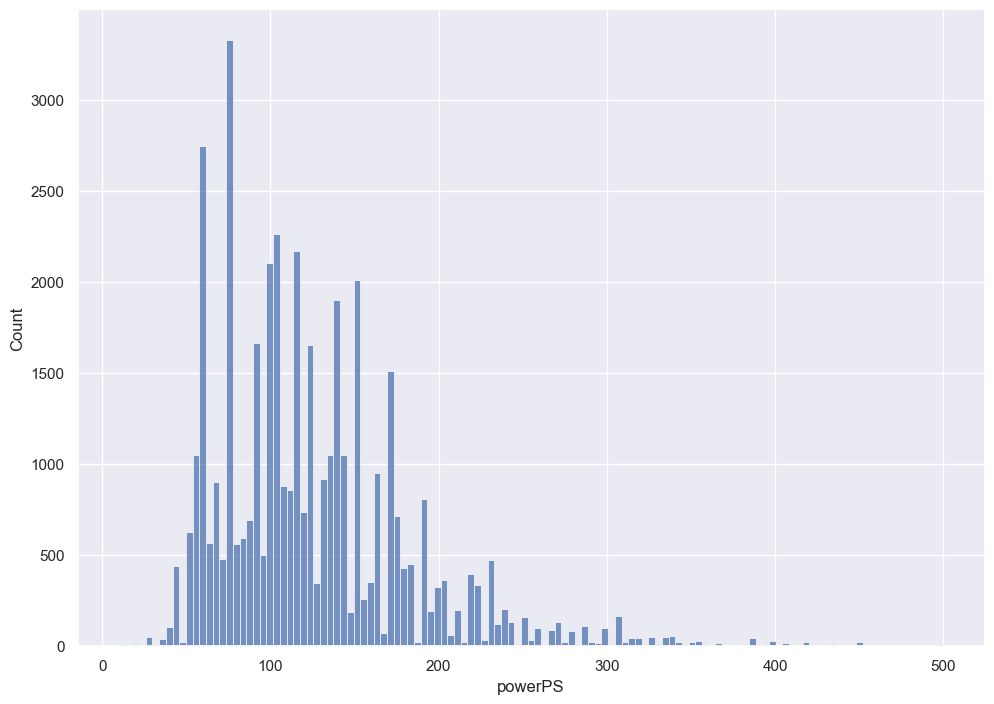

In [37]:
sns.histplot(cars['powerPS'])

<Axes: ylabel='powerPS'>

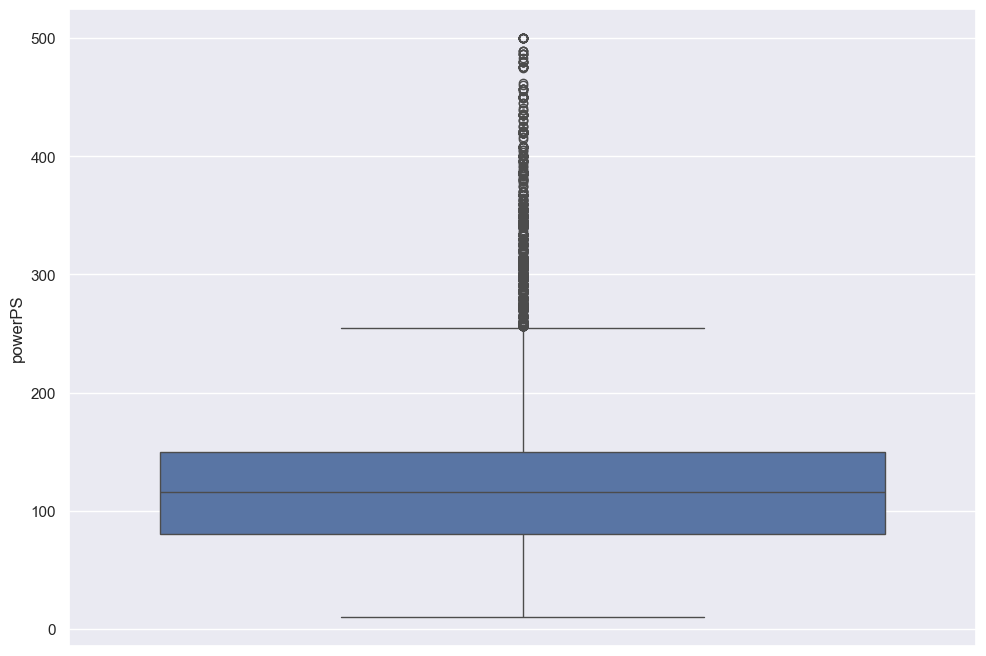

In [38]:
sns.boxplot(y=cars['powerPS'])

<Axes: xlabel='Age', ylabel='price'>

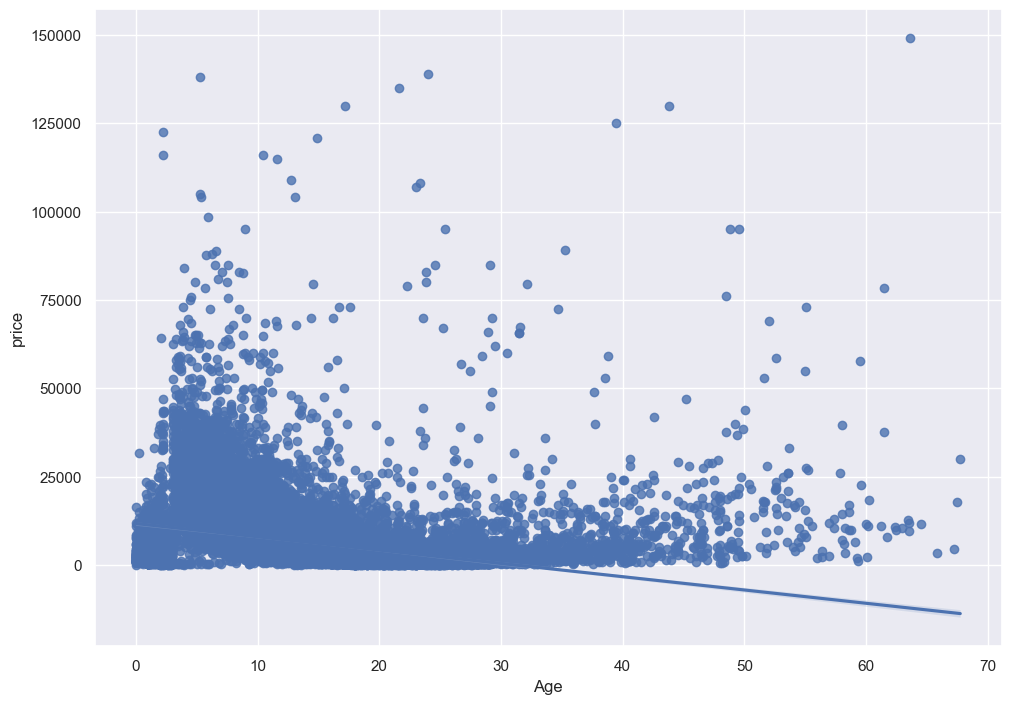

In [39]:
sns.regplot(x='Age', y='price', scatter=True, data=cars)

<Axes: xlabel='powerPS', ylabel='price'>

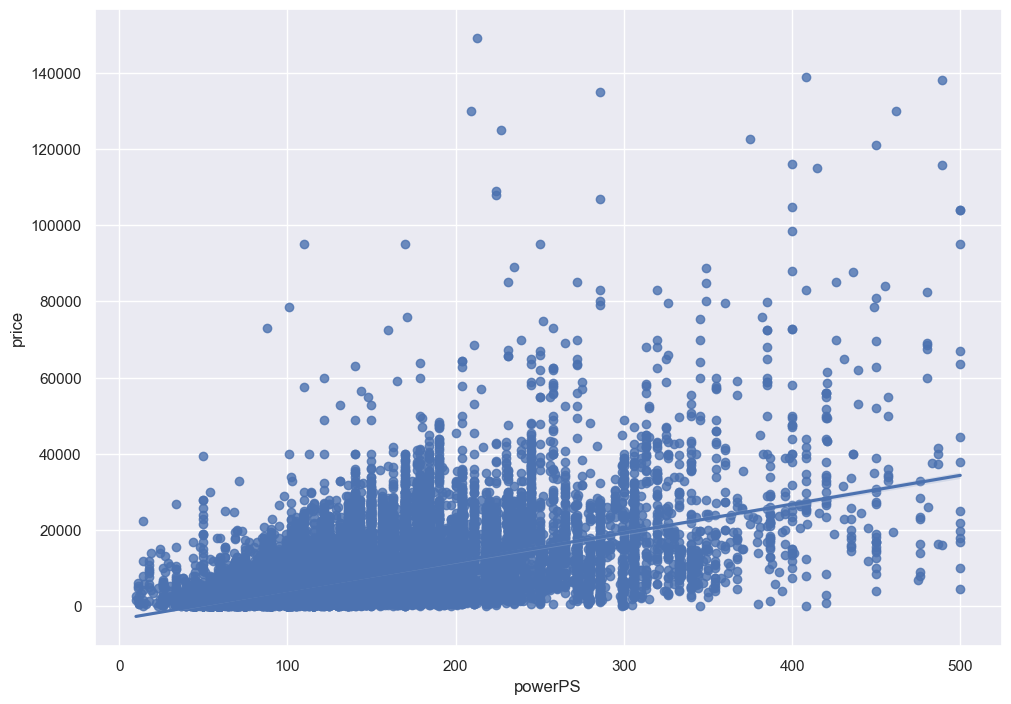

In [43]:
sns.regplot(x='powerPS', y='price', scatter=True, data=cars)

In [44]:
cars['seller'].value_counts()

seller
private       42771
commercial        1
Name: count, dtype: int64

In [46]:
pd.crosstab(cars['seller'],columns='count', normalize=True)

col_0,count
seller,
commercial,0.00
private,1.00


<Axes: xlabel='seller', ylabel='count'>

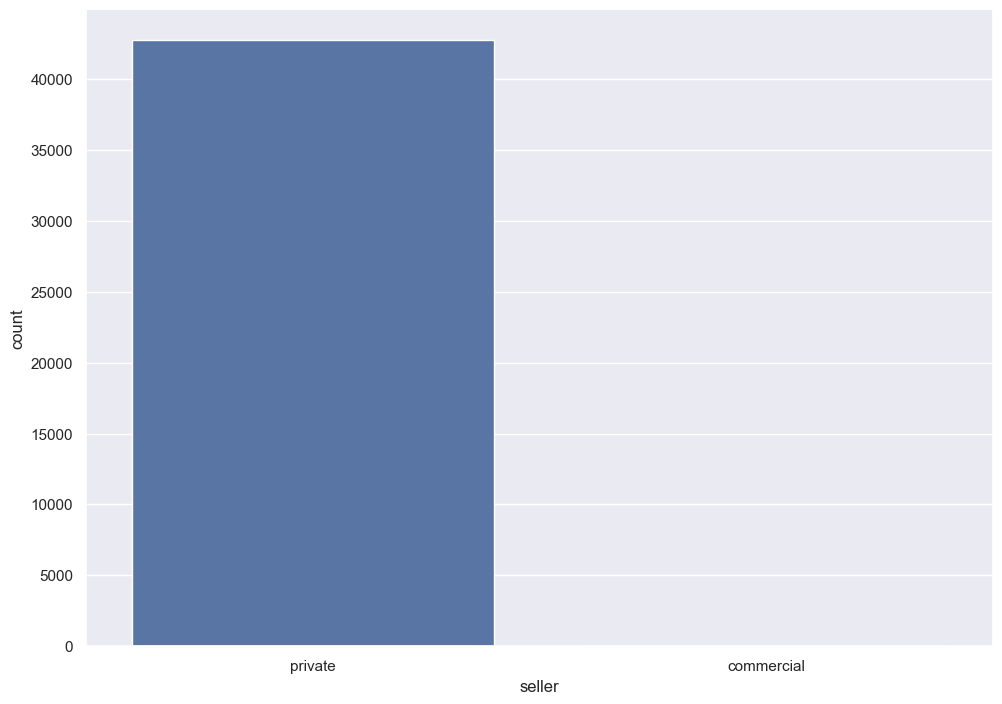

In [47]:
sns.countplot(x='seller', data=cars)

In [48]:
cars['offerType'].value_counts()

offerType
offer    42772
Name: count, dtype: int64

In [49]:
cars['abtest'].value_counts()

abtest
test       22128
control    20644
Name: count, dtype: int64

In [51]:
pd.crosstab(cars['abtest'], columns='count', normalize=True)

col_0,count
abtest,
control,0.48
test,0.52


In [52]:
cars['vehicleType'].value_counts()

vehicleType
limousine        11746
small car         9285
station wagon     8076
bus               3597
cabrio            2792
coupe             2261
suv               1813
others             326
Name: count, dtype: int64

<Axes: xlabel='vehicleType', ylabel='count'>

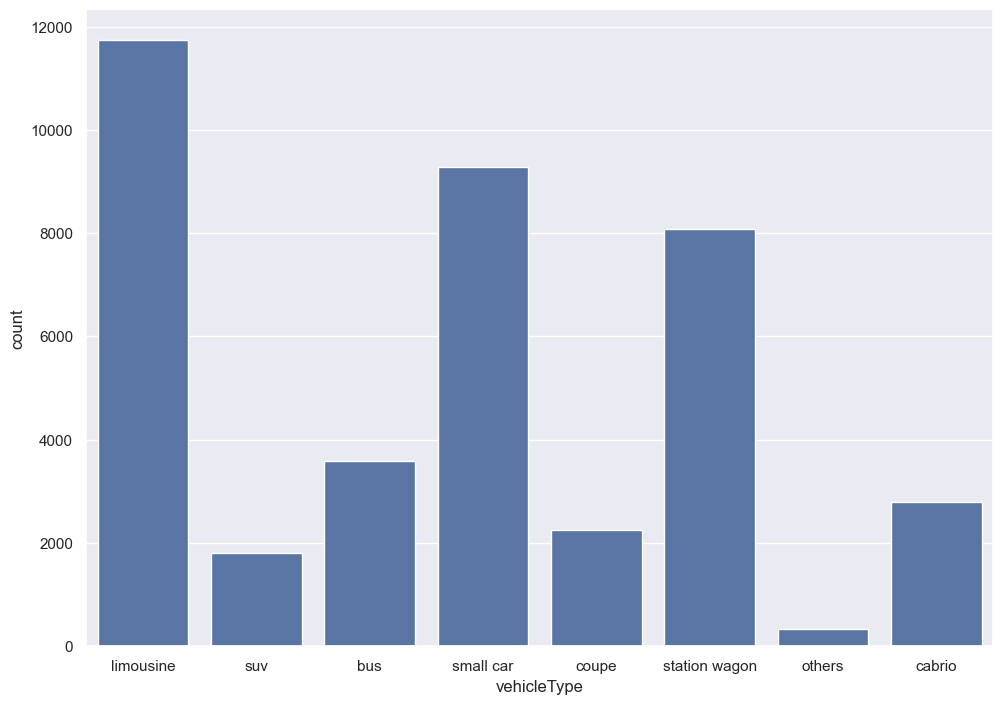

In [55]:
sns.countplot(x='vehicleType', data=cars)

In [56]:
cars['gearbox'].value_counts()

gearbox
manual       32582
automatic     9396
Name: count, dtype: int64

In [57]:
cars['model'].value_counts()

model
golf          3478
others        2900
3er           2482
polo          1500
corsa         1386
              ... 
b_max            1
serie_3          1
elefantino       1
charade          1
rangerover       1
Name: count, Length: 247, dtype: int64

In [58]:
col = ['seller', 'offerType', 'abtest']
cars=cars.drop(col, axis=1)
copy = cars.copy()

In [60]:
copySelected = copy.select_dtypes(exclude=[object])

In [61]:
copySelected.corr()

,price,powerPS,kilometer,Age
price,1.00,0.58,-0.44,-0.34
powerPS,0.58,1.00,-0.02,-0.15
kilometer,-0.44,-0.02,1.00,0.29
Age,-0.34,-0.15,0.29,1.00


In [64]:
copySelected.corr().loc[:, 'price'].abs().sort_values(ascending=False)[1:]

powerPS     0.58
kilometer   0.44
Age         0.34
Name: price, dtype: float64

In [65]:
cars_omit = cars.dropna(axis=0)

In [66]:
cars_omit = pd.get_dummies(cars_omit, drop_first=True)

In [79]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as mse

In [1]:
x = cars_omit.drop(['price'], axis=1)
y = cars_omit['price']

NameError: name 'cars_omit' is not defined

array([[<Axes: title={'center': 'before'}>,
        <Axes: title={'center': 'after'}>]], dtype=object)

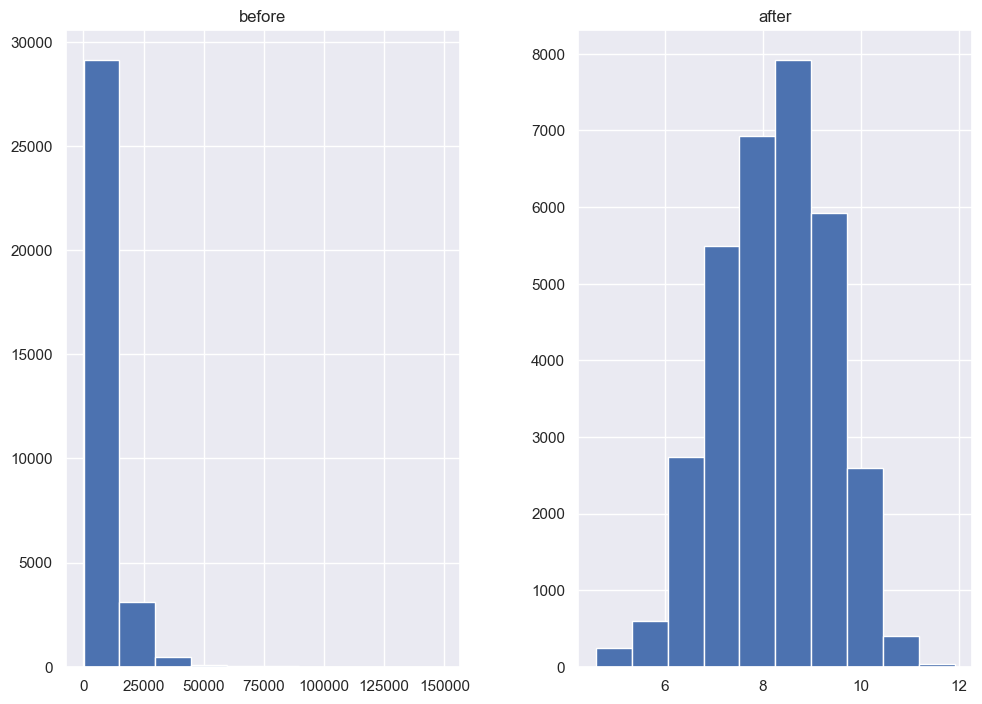

In [71]:
prices  = pd.DataFrame({'before':y, 'after':np.log(y)})
prices.hist()

In [72]:
y = np.log(y)

In [73]:
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.3, random_state=3)

In [74]:
np.mean(testY)

8.249615787653267

In [75]:
base_pred = np.repeat(np.mean(testY), len(testY))

In [77]:
base_root_mean_error = np.sqrt(mean_squared_error(testY, base_pred))
base_root_mean_error

1.1274483657478247

In [78]:
lgr = LinearRegression(fit_intercept=True)
model = lgr.fit(trainX, trainY)

In [80]:
pred = lgr.predict(testX)
error = mse(testY, pred)
error

0.2976227584928341

In [81]:
res = testY - pred

<Axes: ylabel='price'>

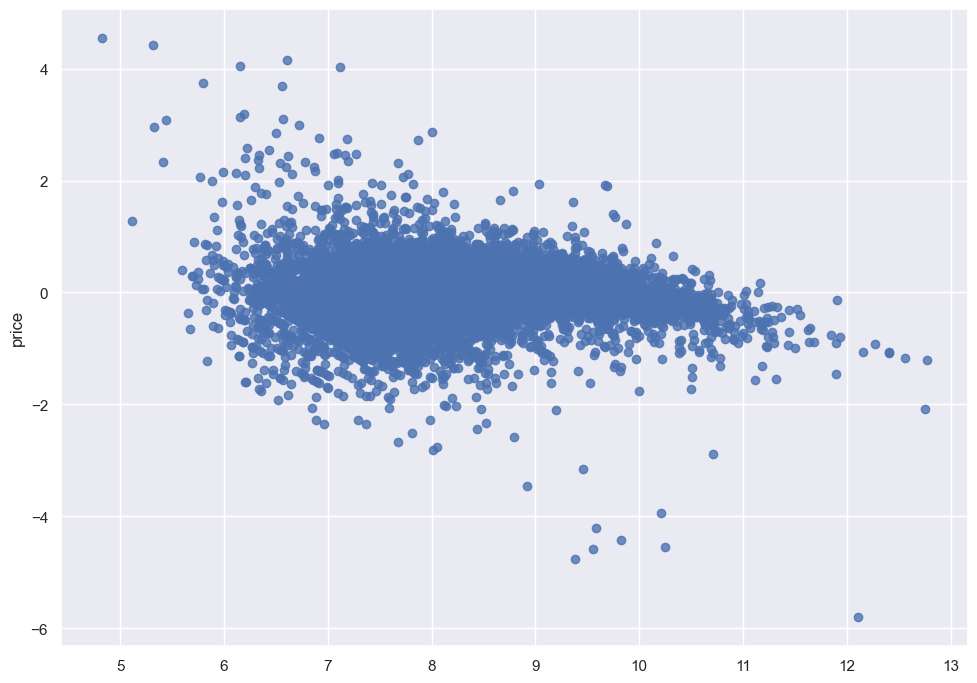

In [82]:
sns.regplot(x=pred, y=res, scatter=True, fit_reg=False)

In [83]:
res.describe()

count   9866.00
mean       0.00
std        0.55
min       -5.80
25%       -0.26
50%        0.04
75%        0.30
max        4.55
Name: price, dtype: float64

In [86]:
rf = RandomForestRegressor(n_estimators=100, max_depth=100, min_samples_split=10, min_samples_leaf=4, random_state=1)

In [87]:
modelr = rf.fit(trainX, trainY)

In [88]:
predr = modelr.predict(testX)
errorr = mse(testY, predr)

In [89]:
errorr

0.19016020985430382